In [8]:
from sklearn.cluster import KMeans
from skimage.io import imread, imsave, imshow
from matplotlib import pyplot as plt
from skimage.color import rgb2gray
from skimage.measure import label, regionprops
from skimage.morphology import opening
import numpy as np

In [2]:
image_path = '/home/acucena/pp.jpeg'
try:  
    img = imread(image_path)  
except IOError: 
    print("Erro ao abrir a imagem")

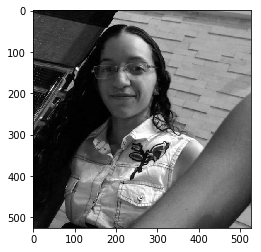

In [3]:
img = rgb2gray(img)
plt.imshow(img, cmap='gray')
plt.show()

In [4]:
pixels = img.reshape(-1,1)
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=1234)
kmeans.fit(pixels)
mask = kmeans.labels_.reshape(img.shape)


In [28]:
inertia = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=1234)
    kmeans.fit(img)
    inertia.append((i,kmeans.inertia_,))

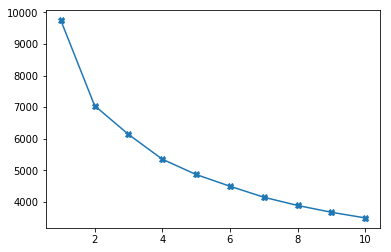

In [29]:
plt.plot([w[0] for w in inertia],[w[1] for w in inertia], marker="X")

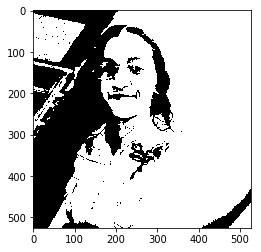

In [9]:
fundo = np.zeros(img.shape)
fundo = fundo + np.where(mask==2,0,1)
fundo = opening(fundo)
plt.imshow(fundo,cmap='gray')
plt.show()

In [15]:
labels = label(fundo, connectivity=1)

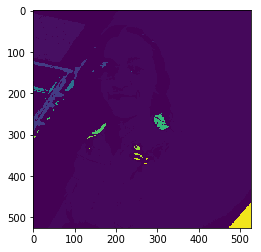

In [16]:
plt.imshow(labels)

In [17]:
props = regionprops(labels)

In [21]:
props[0].area

178756